In [2]:
import pandas as pd
import numpy as np
import os

In [35]:
os.chdir("/users/m/Dev/Data/datasets")
dt = pd.read_csv("enigma-us.gov.hhs.npdb.report-full.csv")#,nrows=9999)

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (9,10,11,12,15,16,19,23,24,30,35,38,40,43,44,47,48,52,53,57,64,66,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
malp1 = dt[['alegatn1_text','outcome_text','pyrrltns_text','homestat','ptgender',
'paytype',
'grad',
'workstat',
'ptage_text',
'licnfeld_text',           
'origyear',
'npmalrpt',
'alegatn2_text',
'malyear2',
'payment',
'licnstat',
'malyear1',
'ptage',
'practage',
'algnnatr_text',
'totalpmt',
   'serialid' ]]
len(malp1.index)

898901

In [22]:
# rename columns for clarity (not working yet)
malp1.rename(columns={'alegatn1_text':'allegation1','alegatn2_text':'allegation2'},inplace=True)
#malp1.columns.str.replace("alegatn1_text", "allegation1")
malp1.head()

,allegation1,outcome_text,pyrrltns_text,homestat,ptgender,paytype,grad,workstat,ptage_text,licnfeld_text,...,allegation2,malyear2,payment,licnstat,malyear1,ptage,practage,algnnatr_text,totalpmt,serialid
0,Failure to Diagnose,NaN,Insurance Company (Legacy report RECTYPE = M p...,NaN,NaN,S,1970,AZ,NaN,Allopathic Physician (MD),...,Failure/Delay in Referral or Consultation,1996,195000,AZ,1966,NaN,10,Diagnosis Related,195000,1
1,Allegation – Not Otherwise Classified Specify,NaN,Insurance Company (Legacy report RECTYPE = M p...,NaN,NaN,S,1940,TX,NaN,Allopathic Physician (MD),...,NaN,NaN,12500,TX,1987,NaN,60,Medication Related,12500,2
2,Failure to Diagnose,NaN,Insurance Company (Legacy report RECTYPE = M p...,CT,NaN,U,1960,CT,NaN,Allopathic Physician (MD),...,NaN,NaN,185000,CT,1984,NaN,10,Diagnosis Related,185000,3
3,Surgical or Other Foreign Body Retained,NaN,Insurance Company (Legacy report RECTYPE = M p...,NaN,NaN,S,1960,NJ,NaN,Allopathic Physician (MD),...,NaN,NaN,1500,NJ,1993,NaN,50,Surgery Related,1500,4
4,Failure to Perform Procedure,Death,Self-Insured Organization (RECTYPE = P 1/31/20...,MO,M,S,1990,MD,Age 50 through 59,Resp. Therapy Technician,...,NaN,NaN,22500,MO,1999,50,10,Treatment Related,22500,5


## Basic summary stats by column

In [26]:
#malp1['ptage_text'].value_counts(dropna=False)
dt['licnfeld_text'].value_counts(dropna=False)

Allopathic Physician (MD)                         723
Dentist                                           108
Osteopathic Physician (DO)                         50
Registered (RN) Nurse                              29
Phys. Asst. Allopathic                             16
Podiatrist                                         16
Chiropractor                                       11
Phys. Intern/Resident (MD)                         10
Pharmacist                                          8
Physical Therapist                                  7
Nurse Practitioner                                  4
Nurse Anesthetist                                   3
Nurse Midwife                                       3
Optometrist                                         2
Clinical Psychologist [last use 9/9/02]             2
Resp. Therapy Technician                            1
Medical Technologist [changed to 501(6/15/09)]      1
EMT Basic                                           1
Medical Assistant           

## Let's clean the data

In [7]:
# - allegation code is important when available, e.g. failure to admit to hospital

In [40]:
# analyze different states available
print "Missing state values:\n", malp1[['homestat','workstat','licnstat']].isnull().sum()
# fill in missing data in this order
# workstat, licnstat, homestat (pract.work state, licensed, home)
nostate = malp1['workstat'].isnull()
malp1.loc[nostate,'workstat'] = malp1.loc[nostate,'licnstat']
nostate = malp1['workstat'].isnull()
malp1.loc[nostate,'workstat'] = malp1.loc[nostate,'homestat']
nostate = malp1['workstat'].isnull()
malp1.loc[nostate,'workstat'] = 'NO' # last measure
print "Remaining missing values: ", malp1['workstat'].isnull().sum()

Missing state values:
homestat    344914
workstat    388370
licnstat     61058
dtype: int64
Remaining missing values:  0


In [9]:
# check the year data
print "Missing year: ",(malp1['origyear'].isnull().sum())
#print "Missing  pmt: ",(malp1['payment'].isnull().sum())
#print "Filling total pmt with 'payment'"
#malp1.totalpmt.fillna(malp1.payment,inplace=True)
#print "Missing total pmt: ",(malp1['totalpmt'].isnull().sum()), "total:", malp1['totalpmt'].sum()

Missing year:  0


In [10]:
malp1[['origyear','malyear1','malyear2', 'npmalrpt', 'grad']].head()

,origyear,malyear1,malyear2,npmalrpt,grad
0,2001,1966,1996,1,1970
1,1993,1987,NaN,1,1940
2,1991,1984,NaN,1,1960
3,1995,1993,NaN,4,1960
4,2010,1999,NaN,1,1990


In [11]:
malp1[['payment','totalpmt']].head()

,payment,totalpmt
0,195000,NaN
1,12500,NaN
2,185000,NaN
3,1500,NaN
4,22500,22500


In [41]:
# fix the payment data
print "Missing total pmt: ",(malp1['totalpmt'].isnull().sum()), "total:", malp1['totalpmt'].sum()
print "Missing  pmt: ",(malp1['payment'].isnull().sum())
print "Filling total pmt with 'payment'"
malp1.totalpmt.fillna(malp1.payment,inplace=True)
print "Missing total pmt: ",(malp1['totalpmt'].isnull().sum()), "total:", malp1['totalpmt'].sum()

Missing total pmt:  775250 total: 35564936700.0
Missing  pmt:  524584
Filling total pmt with 'payment'
Missing total pmt:  524584 total: 82424951250.0


In [42]:

# create summary a table by year. reset numeric index
pmtByYear = malp1.groupby('origyear')['totalpmt'].agg(['sum', 'count','min','max']).reset_index()
pmtByYear

,origyear,sum,count,min,max
0,1990,336745850,2856,50,4450000
1,1991,2320687700,17960,50,5250000
2,1992,2764114150,19758,50,13500000
3,1993,2886276450,19402,50,18500000
4,1994,3000798600,19614,50,12500000
5,1995,2922797500,17905,50,9350000
6,1996,3414540100,19143,50,7350000
7,1997,3337433100,18191,50,15500000
8,1998,3304179650,17498,50,10500000
9,1999,3629051350,18788,50,16500000


## Simple visualizations using Seaborn 

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Plot of payments by year


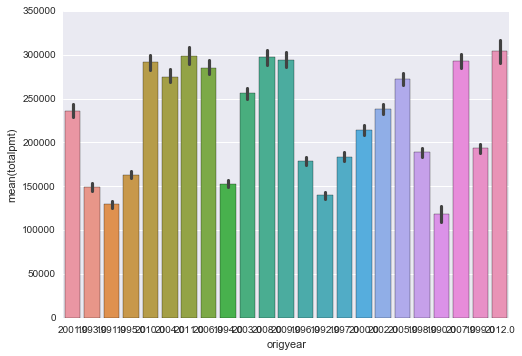

In [43]:
print "Plot of payments by year"
sns.barplot(x="origyear", y="totalpmt", data=malp1);

AttributeError: max must be larger than min in range parameter.

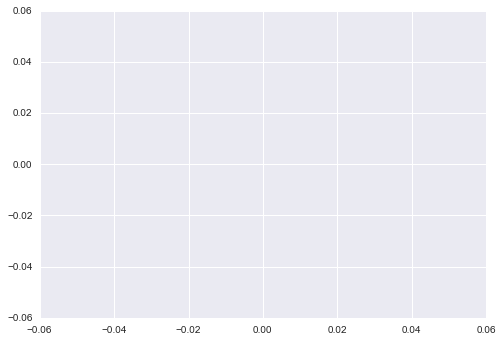

In [46]:
sns.distplot(malp1['totalpmt'],kde=False)


Plot of payments by year


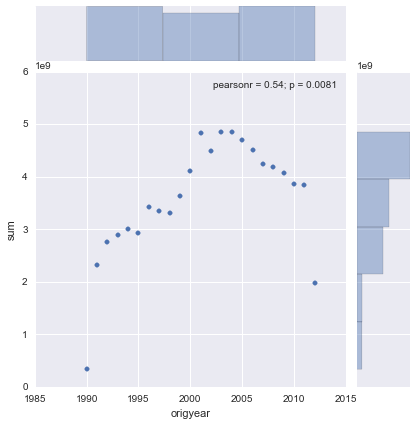

In [47]:
print "Plot of payments by year"
sns.jointplot(x="origyear", y="sum", data=pmtByYear);

Plot of payments by state


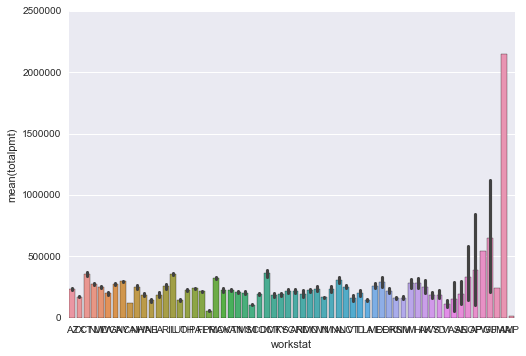

In [44]:
print "Plot of payments by state"
sns.barplot(x="workstat", y="totalpmt", data=malp1);